In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

In [ ]:
df = pd.read_csv('./drive/My Drive/Datasets/Exames/exames.csv')
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
df.shape

(569, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [ ]:
# drop id column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['diagnostico', 'exame_1', 'exame_2', 'exame_3', 'exame_4', 'exame_5',
       'exame_6', 'exame_7', 'exame_8', 'exame_9', 'exame_10', 'exame_11',
       'exame_12', 'exame_13', 'exame_14', 'exame_15', 'exame_16', 'exame_17',
       'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22', 'exame_23',
       'exame_24', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_29',
       'exame_30', 'exame_31', 'exame_32', 'exame_33'],
      dtype='object')

In [ ]:
y = df['diagnostico']
X = df.drop('diagnostico', axis=1)

In [ ]:
X.isnull().sum()

exame_1       0
exame_2       0
exame_3       0
exame_4       0
exame_5       0
exame_6       0
exame_7       0
exame_8       0
exame_9       0
exame_10      0
exame_11      0
exame_12      0
exame_13      0
exame_14      0
exame_15      0
exame_16      0
exame_17      0
exame_18      0
exame_19      0
exame_20      0
exame_21      0
exame_22      0
exame_23      0
exame_24      0
exame_25      0
exame_26      0
exame_27      0
exame_28      0
exame_29      0
exame_30      0
exame_31      0
exame_32      0
exame_33    419
dtype: int64

In [ ]:
X.drop('exame_33', axis=1, inplace=True)

In [ ]:
# set seed number
SEED = 123143
np.random.seed(SEED)

# split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
268,12.87,16.21,82.38,103.78,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,0.2345,1.2190,1.546,18.24,0.005518,0.02178,0.02589,0.00633,0.02593,0.002157,13.90,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.786,0.0578,0.3604,0.07062
422,11.61,16.02,75.46,103.78,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,0.06320,0.2456,0.7339,1.667,15.89,0.005884,0.02005,0.02631,0.01304,0.01848,0.001982,12.64,19.67,81.93,475.7,0.1415,0.2170,0.2302,0.786,0.1105,0.2787,0.07427
168,17.47,24.68,116.10,103.78,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,0.06365,1.0880,1.4100,7.337,122.30,0.006174,0.03634,0.04644,0.01569,0.01145,0.005120,23.14,32.33,155.30,1660.0,0.1376,0.3830,0.4890,0.786,0.1721,0.2160,0.09300
501,13.82,24.49,92.33,103.78,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,0.4751,1.5280,2.974,39.05,0.009680,0.03856,0.03476,0.01616,0.02434,0.006995,16.01,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.786,0.1521,0.3651,0.11830
563,20.92,25.09,143.00,103.78,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.786,0.2542,0.2929,0.09873


In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
print('Score', clf.score(X_test, y_test)*100)

# is it a good baseline?

Score 92.39766081871345


In [ ]:
# Dummy classifier model
clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_train, y_train)
print('Score Dummy', clf_dummy.score(X_test, y_test)*100)

Score Dummy 66.66666666666666


In [ ]:
# standard scaler
scaled_data = StandardScaler()
exams_values = scaled_data.fit_transform(X)

exams_values = pd.DataFrame(data = exams_values,
                            columns = X.keys())

In [ ]:
# plot function
def violin_plot(values, start, end):
  plot_data = pd.concat([y_train, values.iloc[:,start:end]], axis=1)
  plot_data = pd.melt(plot_data, id_vars='diagnostico',
                      var_name='exames',
                      value_name='valores')
  plt.figure(figsize=(10,10))
  sns.violinplot(x = 'exames', 
                 y = 'valores', hue = 'diagnostico', 
                 data = plot_data, split = True)
  plt.xticks(rotation=90)

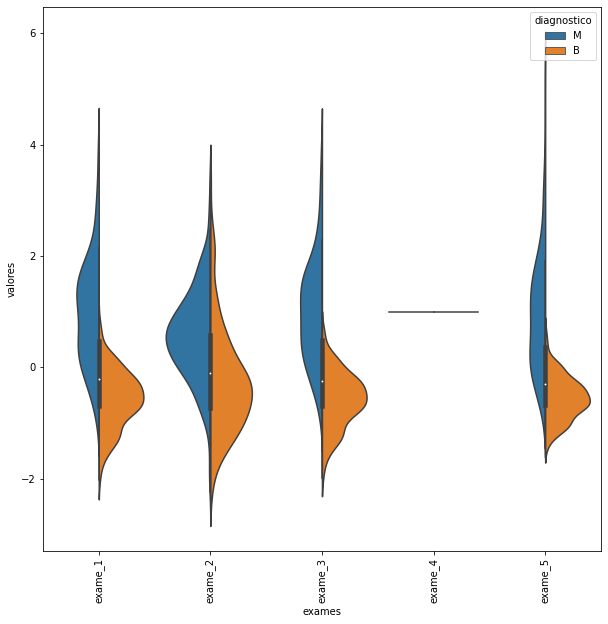

In [ ]:
violin_plot(exams_values, 0, 5)

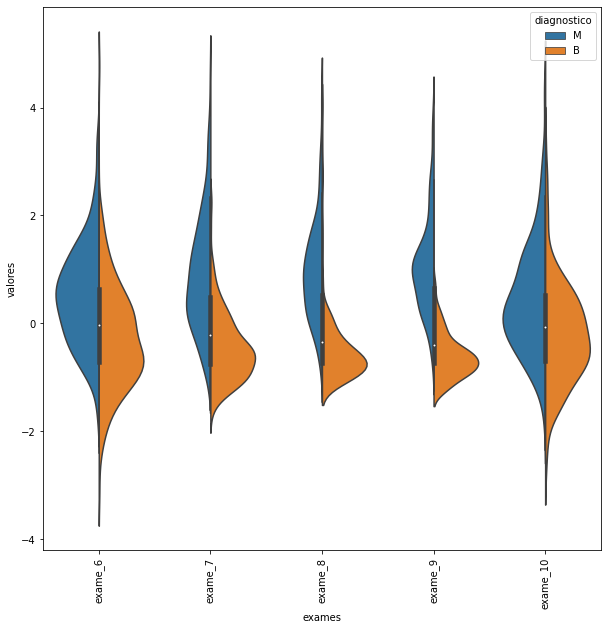

In [ ]:
violin_plot(exams_values, 5, 10)

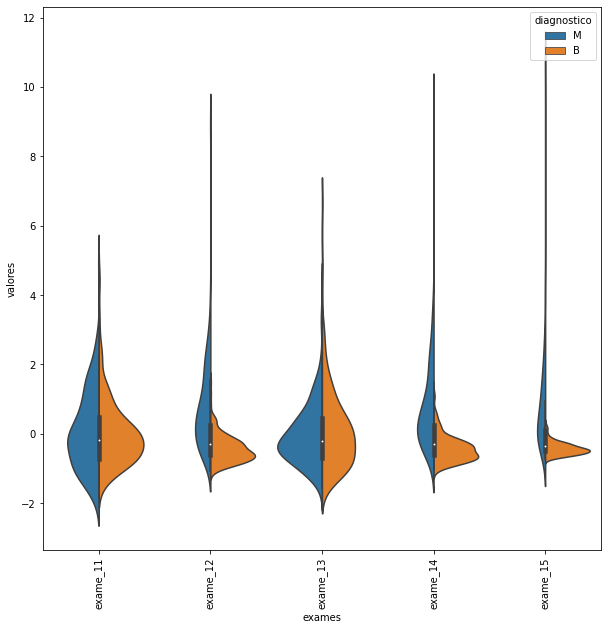

In [ ]:
violin_plot(exams_values, 10, 15)

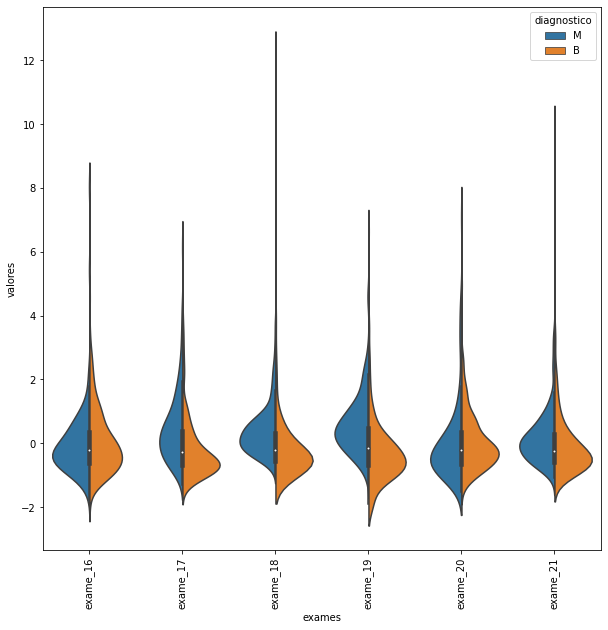

In [ ]:
violin_plot(exams_values, 15, 21)

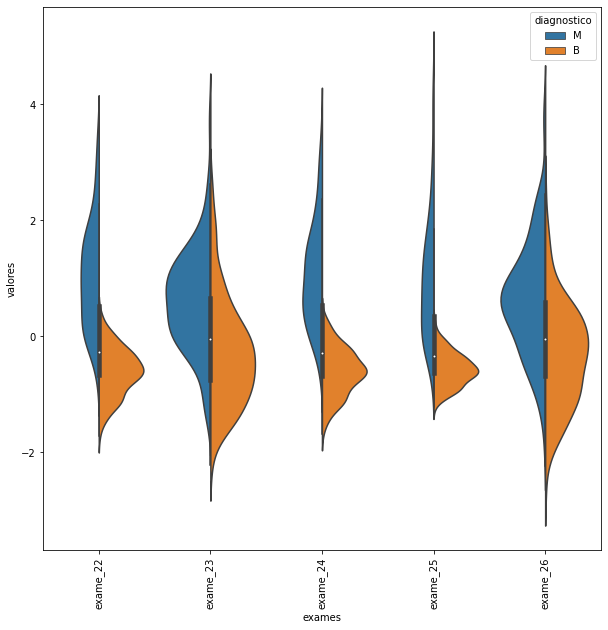

In [ ]:
violin_plot(exams_values, 21, 26)

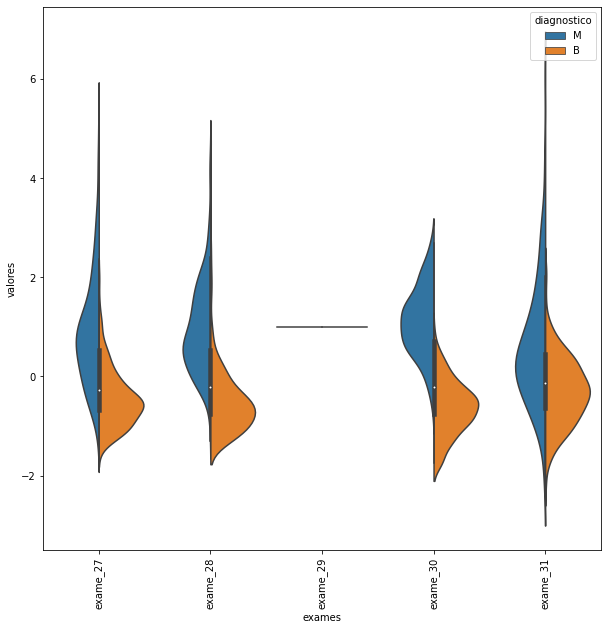

In [ ]:
violin_plot(exams_values, 26, 31)

In [ ]:
exams_values.shape

(569, 32)

In [ ]:
# drop 'exame_4' e 'exame_29'
exams_values = exams_values.drop(['exame_4', 'exame_29'], axis=1)
exams_values.shape

(569, 30)

In [ ]:
# correlation
correlation_matrix = exams_values.corr()
correlation_matrix_v1 = correlation_matrix[correlation_matrix>0.99].sum()
correlation_matrix_v1

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
correlation_matrix_v2 = correlation_matrix_v1[correlation_matrix_v1>1]
correlation_matrix_v2

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
correlation_matrix_v3 = exams_values.drop(columns=['exame_3', 'exame_24'])
correlation_matrix_v3


,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
SEED = 123143
np.random.seed(SEED)

# split train test
X_train, X_test, y_train, y_test = train_test_split(correlation_matrix_v3, y, test_size=0.3)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
print("score sem variaiveis correlacionadas", clf.score(X_test, y_test)*100)

score sem variaiveis correlacionadas 92.98245614035088


In [ ]:
# ele faz todos os pré processamentos e depois divide de novo entre treino e teste - não são todos as transformações de veriáveis que permitem isso

In [ ]:
# use again not scaled dataset
X_1 = X.drop(['exame_4', 'exame_29', 'exame_3', 'exame_24'], axis=1)

In [ ]:

SEED = 123143
np.random.seed(SEED)

# split train test
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3)

In [ ]:
X_train.shape, y_train.shape

((398, 28), (398,))

In [ ]:
scores = []
for k in tqdm(range(3,29)):
  select_features = SelectKBest(chi2, k = k)
  select_features.fit(X_train, y_train)
  train_kbest = select_features.transform(X_train)
  test_kbest = select_features.transform(X_test)

  clf = RandomForestClassifier(n_estimators=100, random_state=1234)
  clf.fit(train_kbest, y_train)
  score = clf.score(test_kbest, y_test)
  scores.append(score)
  print('K = ', k, 'Score: ', round(score*100, 2))
  #select_rfe = RFE(esimator = clf, n_features_to_select=k, step=1)
  #select_rfe.fit(X_train, y_train)
  #train_rfe = select_rfe.transform(X_train)
  #test_rfe  = select_rfe.transform(X_test)


# which features were selected???

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


K =  3 Score:  94.15
K =  4 Score:  95.91
K =  5 Score:  95.32
K =  6 Score:  94.15
K =  7 Score:  95.91
K =  8 Score:  96.49
K =  9 Score:  96.49
K =  10 Score:  96.49
K =  11 Score:  95.32
K =  12 Score:  94.74
K =  13 Score:  94.74
K =  14 Score:  95.32
K =  15 Score:  94.74
K =  16 Score:  92.98
K =  17 Score:  93.57
K =  18 Score:  92.98
K =  19 Score:  92.98
K =  20 Score:  94.15
K =  21 Score:  94.15
K =  22 Score:  92.98
K =  23 Score:  93.57
K =  24 Score:  92.98
K =  25 Score:  92.4
K =  26 Score:  94.15
K =  27 Score:  94.15
K =  28 Score:  94.15



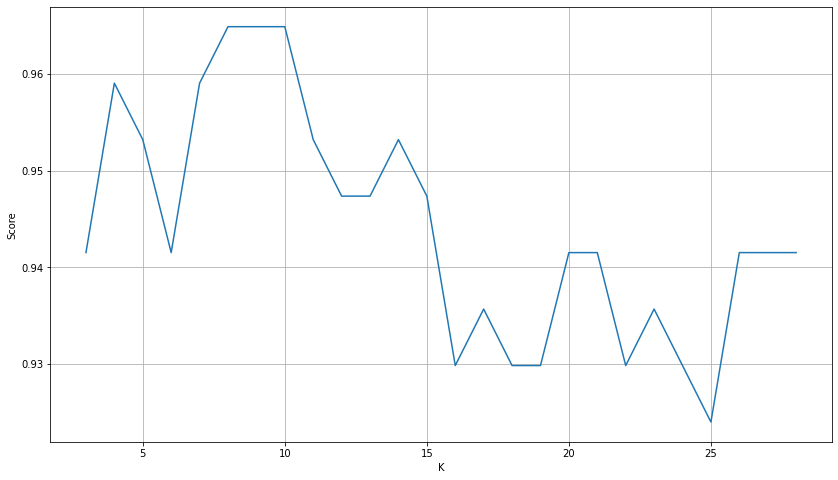

In [ ]:
# plot 
plt.figure(figsize=(14,8))
plt.xlabel("K")
plt.ylabel("Score")
plt.grid()
plt.plot(range(3,29), scores)

In [ ]:
# assistir Mario Filho de Novo

# which features were selected???
selector = SelectKBest(chi2, k=8)
selector.fit(X_train, y_train)

mask = selector.get_support()
X_test.columns[mask]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_14', 'exame_15', 'exame_22',
       'exame_23', 'exame_25'],
      dtype='object')

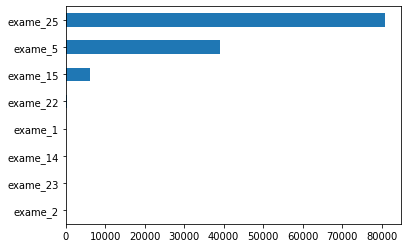

In [ ]:
pd.Series(selector.scores_, index=X_train.columns).sort_values().tail(8).plot.barh()

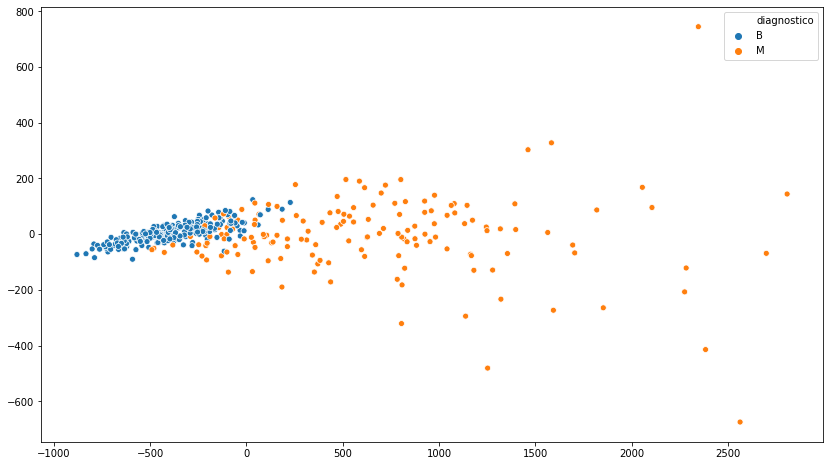

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train = pca.fit_transform(X_train)

plt.figure(figsize=(14,8))
sns.scatterplot(x = train[:, 0], y = train[:,1], hue =y_train)

In [ ]:
train

array([[-3.35735991e+02,  2.60372851e+01],
       [-4.93797811e+02,  9.48645487e-01],
       [ 8.21313380e+02, -1.22414620e+02],
       [-1.28648715e+02, -1.45462386e+00],
       [ 1.14513897e+03,  1.03336196e+02],
       [-4.28626911e+02,  3.07538989e+01],
       [-4.63670748e+02, -3.12568577e+01],
       [-3.91682680e+02,  3.00302604e+01],
       [-5.23197082e+02, -1.35968998e+01],
       [-3.14733310e+02,  2.27261540e+01],
       [ 9.81461745e+02, -1.06359301e+01],
       [-1.44338475e+02,  7.85270289e+01],
       [-4.60157225e+02, -1.44817827e+01],
       [-2.34760216e+02,  5.23460543e+01],
       [ 6.90245892e+02,  2.55798494e+00],
       [-4.23225809e+02, -1.90534916e+01],
       [-3.45543388e+02, -1.62025886e+01],
       [-9.30931610e+01, -1.57279440e+01],
       [ 1.58299343e+03,  3.27665969e+02],
       [-3.41020791e+02,  2.92582771e+01],
       [ 6.13650821e+02, -8.00551249e+01],
       [-4.54562829e+02, -2.10919533e+01],
       [-2.84951746e+02,  4.30560727e+01],
       [-2.